<a href="https://colab.research.google.com/github/kaorimiyazonoo/file_processing/blob/main/Copy_of_Scientific_Visualizations_with_Python_Session_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Visualizations with Python

---

Welcome to the Scientific Visualizations with Python course with the Lane Medical Library!

**Audience**: Scientists or medical professionals interested in visualizing data using Python. Some introductory experience in Python is expected.

## Python Prerequisites

❓ **Try it yourself!** Retrieve the second to fourth elements in `odds` using index range notation.

Indices in Python start at zero. Recall that for a list `x`, the expression `x[0:2]` for example will retrieve the first two elements in the list.

In [ ]:
# List of odd numbers
odds = list(range(1, 21, 2))

# YOUR CODE HERE

❓ **Try it yourself!** Import the `math` module and calculate the square root of 17.

In [ ]:
# YOUR CODE HERE

## Tabular Data

When making figures, we will be dealing with **tabular data** in **flat files**. Tabular data are data organized in tables. You can imagine this data as being in a "spreadsheet" format. Flat files contain one record per line. This is the most common way scientific data is stored, and file formats include: tab-separated file (TSV), comma-separated file (CSV), and excel spreadsheet (XLSX).

A popular library for opening such kinds of data is `pandas`. We will be using `pandas` to load some data that Google Colab provides on each instance.

In [ ]:
import pandas as pd

Let us explore the data provided to us! This is California Housing Prices data from the 1990's US Census. Google provides documentation on the data set [here](https://docs.google.com/document/d/e/2PACX-1vRhYtsvc5eOR2FWNCwaBiKL6suIOrxJig8LcSBbmCbyYsayia_DvPOOBlXZ4CAlQ5nlDD8kTaIDRwrN/pub).

The data are provided as CSV files. To visualize the actual data in the file, let us use a `bash` command to print the first 5 lines in the file. Notice that there is a header row containing column names, followed by one record per line.

In [ ]:
!head -n 6 sample_data/california_housing_train.csv

"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
-114.570000,33.570000,20.000000,1454.000000,326.000000,624.000000,262.000000,1.925000,65500.000000


`pandas` has a `read_csv` function to open files. The function returns a `DataFrame` object that represents the data. We will store this as `cal_housing`.

The `DataFrame` object has many useful functions to operate on the data. To start, we will use the `.head()` function to visualize the first few lines of data. These should match the records from the `bash` command above!

In [ ]:
cal_housing = pd.read_csv('sample_data/california_housing_train.csv')

print(type(cal_housing))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Each column in the `DataFrame` is an object called a `Series`. You can retrieve series using two different notations, as follows. We will use these interchangeably. However, the second notation using index notation is required to create new `Series` objects. As such, I generally recommend using the second method to avoid confusion.

```
cal_housing.longitude.head()
cal_housing['longitude'].head()
```

In [ ]:
longitude_column = cal_housing['longitude']

print(type(longitude_column))

<class 'pandas.core.series.Series'>


In [ ]:
longitude_column.head()

,longitude
0,-114.31
1,-114.47
2,-114.56
3,-114.57
4,-114.57


❓ **Try it yourself!** Retrieve the `total_bedrooms` column in the `cal_housing` data frame. Visualize the first few lines using the `.head()` function.

In [ ]:
# YOUR CODE HERE

❓ **Try it yourself!** The `Series` object also has a `.sum()` function. What do you think it does? Try using it on the `population` column. The `Series` object also has a `.mean()` function. Try using it on the `population` column as well.

In [ ]:
# YOUR CODE HERE

One important processing step with data is to filter based on features of the record. For example, suppose we want to filter to records where the `latitude` is smaller than `34`. The syntax for this is the following.

```
cal_housing[cal_housing['latitude'] < 34]
```

This will return a new `DataFrame` object with the filtered records.

In [ ]:
cal_housing[cal_housing['latitude'] < 34].head() #sets condition to sort values in latitude col to only be less than 34
#why does it double nest? one returns T/F values and you pass that into the dataframe to tell it what to keep based off condition

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0


❓ **Try it yourself!** Confirm that the filtering worked by using the `.min()` and `.max()` functions of the `Series` object. Use these to make sure that the maximum latitude is less than 34 in the resulting `DataFrame` object.

In [ ]:
# YOUR CODE HERE
filtered_housing = cal_housing[cal_housing['latitude'] < 34].head()
cal_housing.max() #calls max on all the cols and prints the header



,0
longitude,-114.5600
latitude,33.6900
housing_median_age,29.0000
total_rooms,2907.0000
total_bedrooms,680.0000
population,1841.0000
households,633.0000
median_income,3.3438
median_house_value,85700.0000


## Loading Some Data

Here, we are creating a `DataFrame` called `cal_housing` that will contain sample data provided in all Google Colab notebooks on housing prices in California. Each row represents one house. All of the variables are continuous (e.g., `latitude` or `median_income`).

We will create two discrete variables. The first is called `median_age`, and it will put the house into one of six bins based on the age of the house. The second is `id`, which is a unique value for each house.

The `.cut()` function in the `pandas` library is quite useful. It converts a continuous variable into a categorical variable by creating bins.

The `.index` property of a `DataFrame` contains unique identifiers for each row. Here, we add it as the `id` column to the data frame.

In [ ]:
# Read data using the pandas read_csv function
cal_housing = pd.read_csv('sample_data/california_housing_train.csv')

# Create the median_age variable using the pandas cut function
cal_housing['median_age'] = pd.cut(
    cal_housing.housing_median_age, bins=[0, 10, 20, 30, 40, 50, 60],
    labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'],
    include_lowest=True
)

# Store the index of the DataFrame as a variable, which assigns a unique value
# to each house
cal_housing['id'] = cal_housing.index

# Visualize the first few lines
cal_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,median_age,id
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,10-20,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,10-20,1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,10-20,2
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,10-20,3
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,10-20,4


## Bar Plot

The bar plot is great for plotting the distribution of a single, discrete variable. In the California housing data set, we created the `median_age` discrete variable. We will create a bar plot for this variable.

First, we need to process the data to extract the distribution of `median_age`. To get the distribution, we need to **count** the number of houses in each bin. `pandas` provides many helpful functions to accomplish this. First, we tell `pandas` that we are binning by `median_age` using the `.groupby()` function. Next, we tell it to count the instances of `id` in each group using the `.count()` function.

The `reset_index()` function turns the index into a column. Try running the code without the `reset_index()` function to see what it does!

In [ ]:
plot_data = cal_housing.groupby('median_age', observed=True)['id'].count()
plot_data = plot_data.reset_index()
plot_data['median_age'] = plot_data['median_age'].astype(str)

plot_data.head()

,median_age,id
0,0-10,1313
1,10-20,3896
2,20-30,3986
3,30-40,4635
4,40-50,2086


Now, we are ready to visualize the data. `matplotlib` is the most popular data visualization library in Python. To see how quickly we can visualize this data, use the next three lines of code to create a bar plot!

In [ ]:
import matplotlib.pyplot as plt

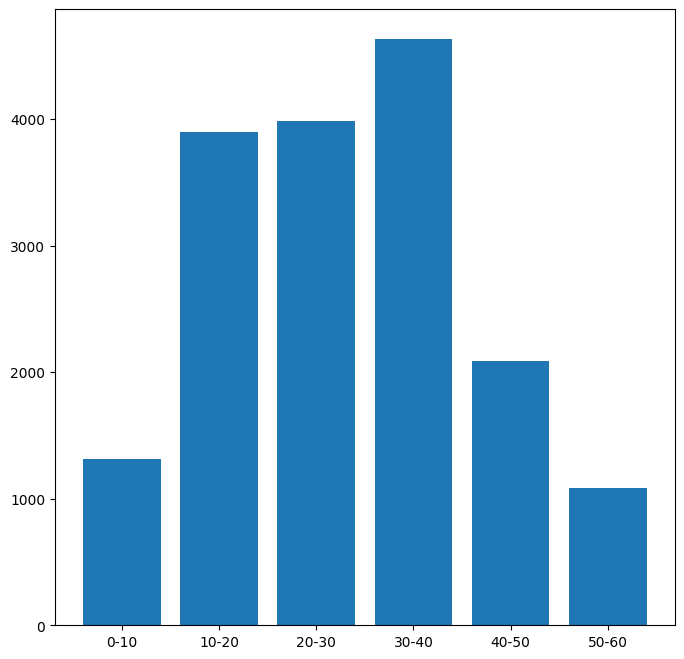

In [ ]:
# Create a new figure that is 8-by-8 inches
plt.figure(figsize=(8, 8))

# Create a bar plot
# Use the median age bins on the horizontal axis
# Set the height of each bar to be the number of houses in each bin
plt.bar(plot_data.median_age, plot_data.id)

# Show the plot
# Not necessary to call this in a Jupyter notebook
plt.show()

❓ **Try it yourself!** The `pyplot` interface has three useful functions to make the graph more readable:

1. `plt.xlabel()`
2. `plt.ylabel()`
3. `plt.title()`

Use the internet to figure out what these functions do, and use them to make your plot more readable!

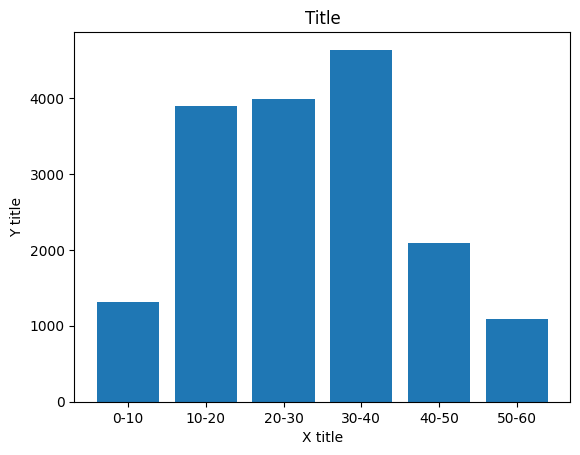

In [ ]:
# YOUR CODE HERE

plt.bar(plot_data.median_age, plot_data.id)
plt.xlabel("X title")
plt.ylabel("Y title")
plt.title("Title")
plt.show()

❓ **Try it yourself!** The `plt.bar` function (and many other graph types) have a `color` argument that can be used to change the color of the graphic elements. There are some colors that are provided by name, such as `'red'`, `'green'`, etc. You can also use hex code encodings of RGB colors, such as `'#8C1515'`. Use this argument to change the color of the bars.

<BarContainer object of 6 artists>

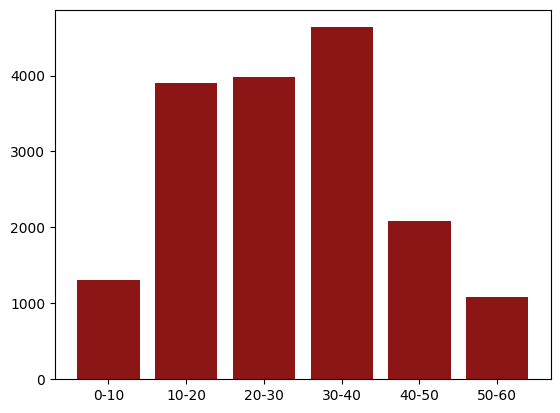

In [ ]:
# YOUR CODE HERE
x, y = plot_data.median_age, plot_data.id
plt.bar(x,y, color="#8C1515")

❓ **Try it yourself!** The `color` argument can also take a list of colors. Color the first two bars, second two bars, and last two bars using unique colors.

<BarContainer object of 6 artists>

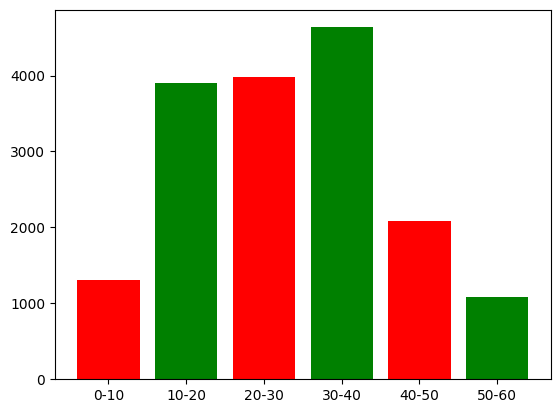

In [ ]:
# YOUR CODE HERE

plt.bar(x,y, color=["red","green"])

❓ **Try it yourself!** Another method to visualize bars is using the `hatch` argument in the `plt.bar` function. Try setting the `hatch` to `'///'` and see what happens!

<BarContainer object of 6 artists>

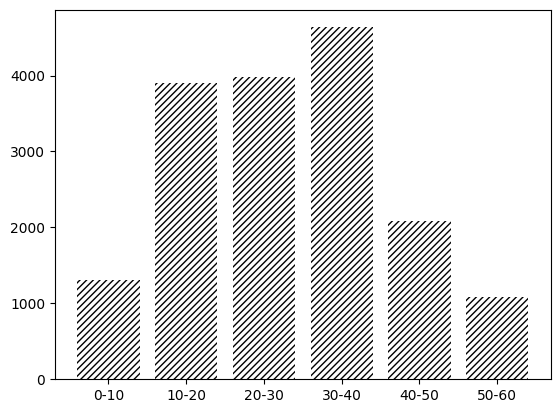

In [ ]:
# YOUR CODE HERE
plt.bar(x,y, color="white", hatch="/////")

## Histogram

The histogram is an extension of the bar plot for continuous variables. We will look at the `median_house_value` variable in the California housing data.

A histogram also bins the data, but does so automatically for you. The goal of a histogram is to visualize the actual distribution of the data using an approximation. A bar plot, in contrast, assumes a fixed set of discrete categories.

Text(0.5, 1.0, 'Distribution of Median House Value in California')

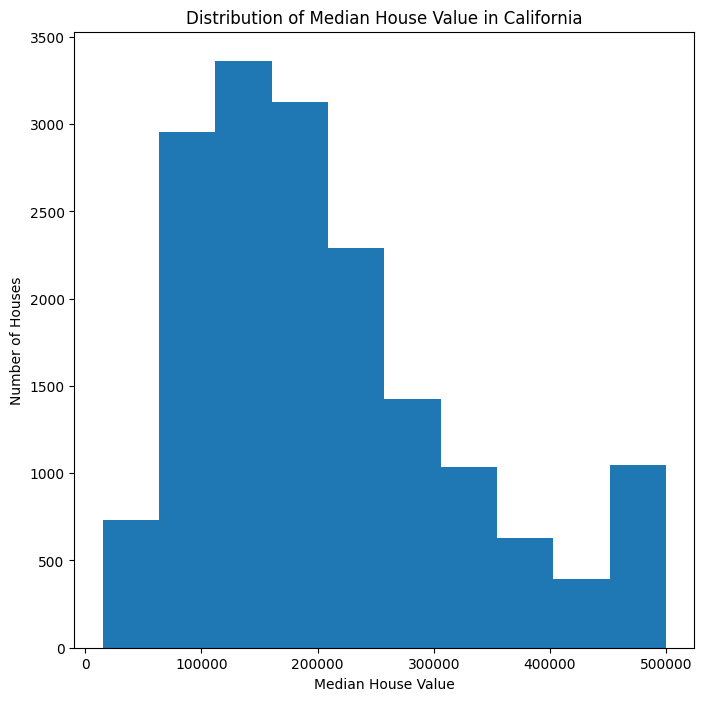

In [ ]:
plt.figure(figsize=(8, 8))

plt.hist(cal_housing.median_house_value)

plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.title('Distribution of Median House Value in California')

❓ **Try it yourself!** The bin with a lot of houses at the very tail of the distribution might be an artifact. To check, use the `bins` argument in the `plt.hist()` function. Set the bins to `50` to visualize the distribution better.

(array([  8.,  12.,  51., 214., 446., 559., 463., 658., 704., 574., 685.,
        588., 675., 670., 744., 799., 627., 684., 584., 433., 500., 547.,
        484., 406., 358., 370., 362., 267., 257., 166., 184., 197., 199.,
        216., 240., 159., 134., 126.,  98., 112.,  88.,  80.,  69.,  67.,
         91.,  50.,  42.,  44.,  42., 867.]),
 array([ 14999.  ,  24699.04,  34399.08,  44099.12,  53799.16,  63499.2 ,
         73199.24,  82899.28,  92599.32, 102299.36, 111999.4 , 121699.44,
        131399.48, 141099.52, 150799.56, 160499.6 , 170199.64, 179899.68,
        189599.72, 199299.76, 208999.8 , 218699.84, 228399.88, 238099.92,
        247799.96, 257500.  , 267200.04, 276900.08, 286600.12, 296300.16,
        306000.2 , 315700.24, 325400.28, 335100.32, 344800.36, 354500.4 ,
        364200.44, 373900.48, 383600.52, 393300.56, 403000.6 , 412700.64,
        422400.68, 432100.72, 441800.76, 451500.8 , 461200.84, 470900.88,
        480600.92, 490300.96, 500001.  ]),
 <BarContainer object o

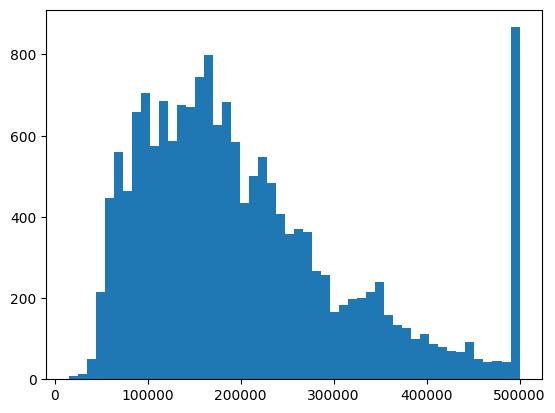

In [ ]:
# YOUR CODE HERE
plt.hist(cal_housing.median_house_value, bins=50)

This plot should show that there are many houses with a median house value of around 500,000. This probably means that any houses with a median house value larger than 500,000 were clamped to this value. We would want to plot the distribution without those values.

❓ **Try it yourself!** Filter the `cal_housing` data frame to `median_house_value` less than 500,000. Plot the histogram of `median_house_value` after filtering.

In [ ]:
# YOUR CODE HERE
#x = cal_housing.median_house_value['median_house_value'] < 500000 #wronggg
#you can also put underlines wherever in an int and it'll work as normal

x_correct = cal_housing[cal_housing['median_house_value'] < 500_000]

plt.hist(x_correct) #sets int number of bins

❓ **Try it yourself!** Change the color of histogram bars using the `color` argument in `plt.hist()`.

In [ ]:
# YOUR CODE HERE

❓ **Try it yourself!** Plot the distribution of the `latitude` column using a histogram. Can you explain the pattern?

(array([ 333.,  664.,  189.,  212.,  100.,  368., 1465., 2526., 2567.,
         493.,  205.,  108.,  106.,   57.,  136.,  141.,   52.,   25.,
          62.,  102.,  131.,  192.,  384.,  199.,  143.,  830.,  513.,
        1285.,  866.,  384.,  275.,  414.,  483.,  114.,  144.,  156.,
          89.,   38.,   94.,   26.,   32.,   33.,   94.,   65.,   40.,
          12.,   10.,   10.,   16.,   17.]),
 array([32.54  , 32.7282, 32.9164, 33.1046, 33.2928, 33.481 , 33.6692,
        33.8574, 34.0456, 34.2338, 34.422 , 34.6102, 34.7984, 34.9866,
        35.1748, 35.363 , 35.5512, 35.7394, 35.9276, 36.1158, 36.304 ,
        36.4922, 36.6804, 36.8686, 37.0568, 37.245 , 37.4332, 37.6214,
        37.8096, 37.9978, 38.186 , 38.3742, 38.5624, 38.7506, 38.9388,
        39.127 , 39.3152, 39.5034, 39.6916, 39.8798, 40.068 , 40.2562,
        40.4444, 40.6326, 40.8208, 41.009 , 41.1972, 41.3854, 41.5736,
        41.7618, 41.95  ]),
 <BarContainer object of 50 artists>)

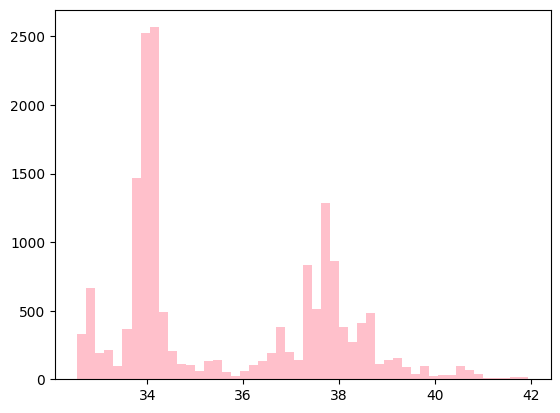

In [ ]:
# YOUR CODE HERE
plt.hist(cal_housing.latitude, color="pink", bins=50) #without the bins it looks more coarse

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.mapsofworld.com%2Fusa%2Fstates%2Fcalifornia%2Fmaps%2Fcalifornia-lat-long-map.jpg&f=1&nofb=1&ipt=de5aa3a686ab5b16d19c2c80ccc86f70fc36052fbafc1cd9f7e915aa885857e7&ipo=images)

In [ ]:
plt.figure(figsize=(4, 8))

plt.scatter(cal_housing.longitude, cal_housing.latitude, s=10, alpha=0.2, color='black')

plt.axhline(34)
plt.axhline(38)

## Saving Figures

Saving high-quality figures is important for publication. It is always recommended that you export figures in a **vector graphics format**. This means that the resulting figure is editable by other software, which can allow you to edit the figure outside of the Python environment.

In this course, we will use the portable document format (PDF). Other examples of vector graphics formats include scalable vector graphics (SVG) and encapsulated PostScript (EPS).

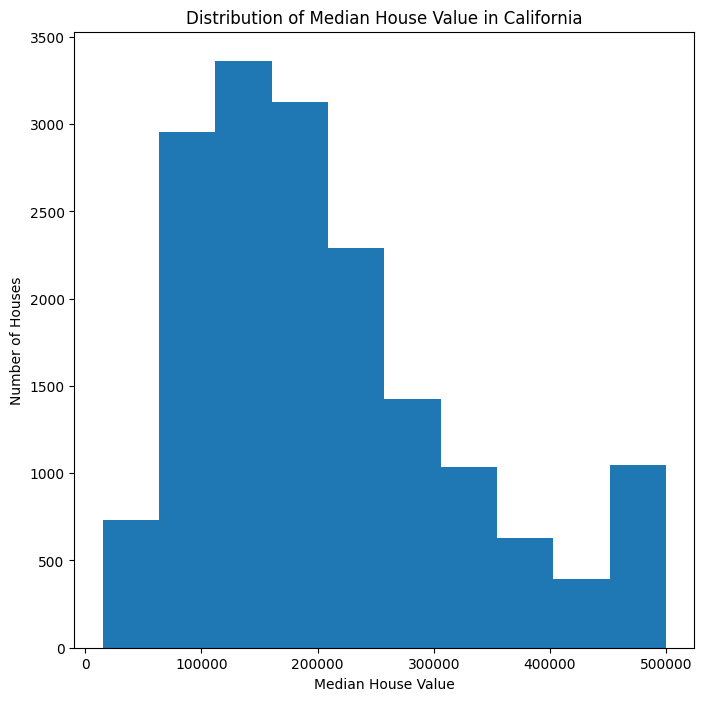

In [ ]:
plt.figure(figsize=(8, 8)) #SVGs store the instructions on how to make the plot.
#PDFs actually have the instructions on how to make the plot.

plt.hist(cal_housing.median_house_value)

plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.title('Distribution of Median House Value in California')

plt.savefig('figure.pdf')

There are some cases where a vector graphics format might not be appropriate. For example, if you are plotting millions of points (for example, when analyzing single-cell RNA-seq data), the vector graphics format file will be gigantic. Instead, you must use a raster format such as portable network graphics (PNG) or joint photographic experts group (JPEG).

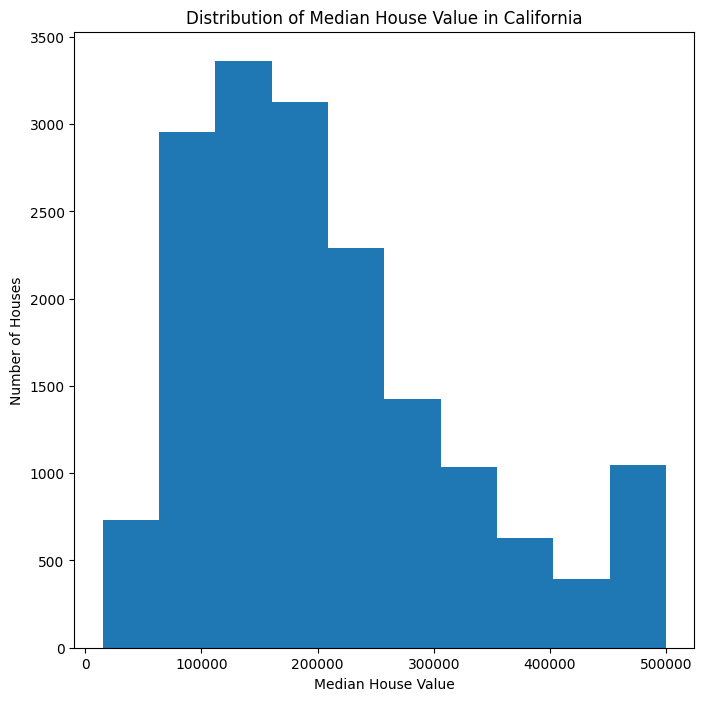

In [ ]:
plt.figure(figsize=(8, 8))

plt.hist(cal_housing.median_house_value)

plt.xlabel('Median House Value')
plt.ylabel('Number of Houses')
plt.title('Distribution of Median House Value in California')

plt.savefig('figure.png')